<a href="https://colab.research.google.com/github/Luganda1/Google-colab-/blob/main/Dr_samwe_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc # contains imgs
from PIL import Image # for reading img files
from numpy.random import default_rng
import datetime as dt
import pandas as pd
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
import matplotlib.dates as mdates

df_annual = pd.read_csv('annual_deaths_by_clinic.csv')
df_monthly = 
pd.read_csv('monthly_deaths.csv')

#Preliminary Data Exploration

In [2]:
df_monthly.shape

(98, 3)

In [3]:
df_monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [4]:
df_annual

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [5]:
df_annual.shape

(12, 4)

In [6]:
print(f'columns name are {df_monthly.columns}')
print(f'columns name are {df_annual.columns}')

columns name are Index(['date', 'births', 'deaths'], dtype='object')
columns name are Index(['year', 'births', 'deaths', 'clinic'], dtype='object')


Which years are included in the dataset?

Are there any NaN values or duplicates?

What were the average number of births that took place per month?

What were the average number of deaths that took place per month?


In [7]:
print(f'years included in the dataset {df_annual.year}')

years included in the dataset 0     1841
1     1842
2     1843
3     1844
4     1845
5     1846
6     1841
7     1842
8     1843
9     1844
10    1845
11    1846
Name: year, dtype: int64


In [8]:
print(f'if any duplicates {df_monthly.duplicated().values.any()}')
print(f'if any NaN {df_monthly.isna().values.any()}')

if any duplicates False
if any NaN False


In [9]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [10]:
df_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [11]:
print(f'Average number of births per month {df_monthly.births.mean()}')

Average number of births per month 267.0


In [12]:
df_annual.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


In [13]:
print(f'Average number of death per month {df_monthly.deaths.mean()}')

Average number of death per month 22.46938775510204


In [14]:
df_monthly.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.

In [15]:
women_died_inbth = sum(df_annual.deaths) / sum(df_annual.births)*100
women_died_inbth
print(f'The percentage of women giving birth who died throughout the 1840s at the hospital: {women_died_inbth:.3}% \n In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013')

The percentage of women giving birth who died throughout the 1840s at the hospital: 7.08% 
 In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013


**Visualise the Total Number of Births 🤱 and Deaths 💀 over Time**

In [16]:
df_monthly.date = pd.to_datetime(df_monthly.date)

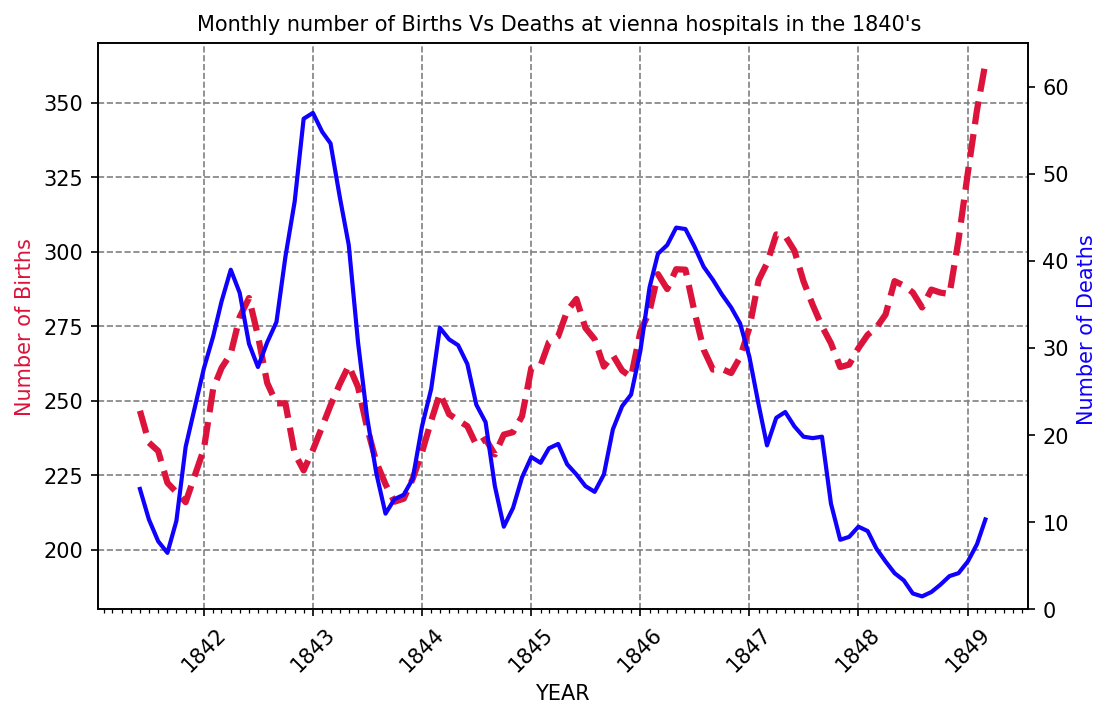

In [17]:
plt.figure(figsize=(8,5), dpi=150)
plt.title("Monthly number of Births Vs Deaths at vienna hospitals in the 1840's ", fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=45)
# plt.grid(b=True, axis='both', which='major')
rolling_avg = df_monthly[['births', 'deaths']].rolling(window=6).mean()

# TICKS
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1 = plt.gca()
ax2 = ax1.twinx() 


# Settig up the ticks on the x-axis
ax1.set_xlabel('YEAR', fontsize=10,)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('Number of Births', fontsize=10, color='crimson')
ax2.set_ylabel('Number of Deaths ', fontsize=10, color='#0F00FF')

# grid
ax1.grid(color='grey', linestyle='--')
# setting y-limits and x-limits
ax1.set_ylim(180, 370)
ax2.set_ylim(0, 65)

# Plotting the graph
ax1.plot(df_monthly.date, rolling_avg.births, color='crimson', linewidth=3, linestyle='--')
ax2.plot(df_monthly.date, rolling_avg.deaths,  color='#0F00FF', linewidth=2, linestyle='-')

# Displays chart explicitly
plt.show()

What we see is that something happened after 1847. The total number of deaths seems to have dropped, despite an increasing number of births! 🤔

#Analysing the Yearly Data Split By Clinic

    Which clinic is bigger or more busy judging by the number of births?

    Has the hospital had more patients over time?

    What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [18]:
fig = px.line(df_annual,
              x='year',
              y='births',
              color='clinic',
              title='Line chart showing Number of Births in Clinic 1 Vs Clinic 2')
fig.show()

We see that more and more women gave birth at the hospital over the years. Clinic 1, which was staffed by male doctors and medical students was also the busier or simply the larger ward. More births took place in clinic 1 than in clinic 2. 

In [19]:
fig = px.line(df_annual,
              x='year',
              y='deaths',
              color='clinic',
              title='Line chart showing Number of Deaths in Clinic 1 Vs Clinic 2')
fig.show()

Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.

    Work out the percentage of deaths for each row in the df_yearly DataFrame by adding a column called "pct_deaths".

    Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).

    Create another plotly line chart to see how the percentage varies year over year with the two different clinics.

    Which clinic has a higher proportion of deaths?

    What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [20]:
df_annual['pct_deaths'] = round(df_annual.deaths / df_annual.births*100, 2)
df_annual

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90
5,1846,4010,459,clinic 1,11.45
6,1841,2442,86,clinic 2,3.52
7,1842,2659,202,clinic 2,7.60
8,1843,2739,164,clinic 2,5.99
9,1844,2956,68,clinic 2,2.30


average maternal death rate

In [21]:
clinic1 = df_annual[df_annual.clinic == 'clinic 1']
clinic2 = df_annual[df_annual.clinic == 'clinic 2']
clinic2

,year,births,deaths,clinic,pct_deaths
6,1841,2442,86,clinic 2,3.52
7,1842,2659,202,clinic 2,7.60
8,1843,2739,164,clinic 2,5.99
9,1844,2956,68,clinic 2,2.30
10,1845,3241,66,clinic 2,2.04
11,1846,3754,105,clinic 2,2.80


In [22]:
avg_c1 = clinic1.deaths.sum() / clinic1.births.sum()*100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')
avg_c2 = clinic2.deaths.sum() / clinic2.births.sum()*100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 1 is 9.92%.
Average death rate in clinic 2 is 3.88%.


9.92%. In comparison, clinic 2 which was staffed by midwives had a much lower death rate of 3.88% over the course of the entire period. Hmm... 🤔

In [23]:
line = px.line(
    df_annual,
    x='year',
    y='pct_deaths',
    color='clinic',
    title='Plotly line chart to see how the percentage varies year over year with the two different clinics.'
)
line.show()

1842 was a rough year. About 16% of women died in clinic 1 and about 7.6% of women died in clinic 2. Still, clinic 2 had a consistently lower death rate than clinic 1! This is what puzzled and frustrated Dr Semmelweis. 

In [24]:
df_monthly.deaths.describe()

count    98.000000
mean     22.469388
std      18.141031
min       0.000000
25%       8.000000
50%      16.500000
75%      36.750000
max      75.000000
Name: deaths, dtype: float64

In [25]:
print(f'The  highest monthly death rate in clinic one: {df_monthly} compared to clinic 2?')

The  highest monthly death rate in clinic one:          date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2
..        ...     ...     ...
93 1848-11-01     310       9
94 1848-12-01     373       5
95 1849-01-01     403       9
96 1849-02-01     389      12
97 1849-03-01     406      20

[98 rows x 3 columns] compared to clinic 2?


The story continues...

At first, Dr Semmelweis thought that the position of the women giving birth was the issue. In clinic 2, the midwives' clinic, women gave birth on their sides. In the doctors' clinic, women gave birth on their backs. So, Dr. Semmelweis, had women in the doctors' clinic give birth on their sides. However, this had no effect on the death rate.

Next, Dr Semmelweis noticed that whenever someone on the ward died, a priest would walk through clinic 1, past the women's beds ringing a bell 🔔. Perhaps the priest and the bell ringing terrified the women so much after birth that they developed a fever, got sick and died. Dr Semmelweis had the priest change his route and stop ringing the bell 🔕. Again, this had no effect.

At this point, Dr Semmelweis was so frustrated he went on holiday to Venice. Perhaps a short break would clear his head. When Semmelweis returned from his vacation, he was told that one of his colleagues, a pathologist, had fallen ill and died. His friend had pricked his finger while doing an autopsy on a woman who had died from childbed fever and subsequently got very sick himself and died. 😮

Looking at the pathologist's symptoms, Semmelweis realised the pathologist died from the same thing as the women he had autopsied.  This was his breakthrough: anyone could get sick from childbed fever, not just women giving birth!

This is what led to Semmelweis' new theory. Perhaps there were little pieces or particles of a corpse that the doctors and medical students were getting on their hands while dissecting the cadavers during an autopsy. And when the doctors delivered the babies in clinic 1, these particles would get inside the women giving birth who would then develop the disease and die.

In June 1846, Dr Semmelweis ordered everyone on his medical staff to start cleaning their hands and instruments not just with soap and water but with a chlorine solution (he didn't know it at the time, but chlorine is an amazing disinfectant). The reason Dr Semmelweis actually chose the chlorine was that he wanted to get rid of any smell on doctors' hands after an autopsy. No one knew anything about bacteria, germs or viruses at the time. 

#The Effect of Handwashing

The Effect of Handwashing

    Add a column called "pct_deaths" to df_monthly that has the percentage of deaths per birth for each row.

In [26]:
df_monthly['pct_deaths'] = round(df_monthly.deaths / df_monthly.births * 100, 2)
df_monthly

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78
...,...,...,...,...
93,1848-11-01,310,9,2.90
94,1848-12-01,373,5,1.34
95,1849-01-01,403,9,2.23
96,1849-02-01,389,12,3.08


In [49]:
year = '1846-06-01'
before_hdwsh = df_monthly[df_monthly.date < year]
after_hdwsh = df_monthly[df_monthly.date >= year]
before_hdwsh


,date,births,deaths,pct_deaths
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78
...,...,...,...,...
59,1846-01-01,336,45,13.39
60,1846-02-01,293,53,18.09
61,1846-03-01,311,48,15.43
62,1846-04-01,253,48,18.97


In [28]:
print(f'The average death rate prior to June 1846: {round(before_hdwsh.deaths.mean(), 2)}')
print(f'The average death rate after to June 1846: {round(after_hdwsh.deaths.mean(), 2)}')

The average death rate prior to June 1846: 26.81
The average death rate after to June 1846: 14.29


Create a DataFrame that has the 6-month rolling average death rate prior to mandatory handwashing.

In [31]:
roll_df = before_hdwsh.set_index('date')
roll_avg = roll_df.rolling(window=6).mean()

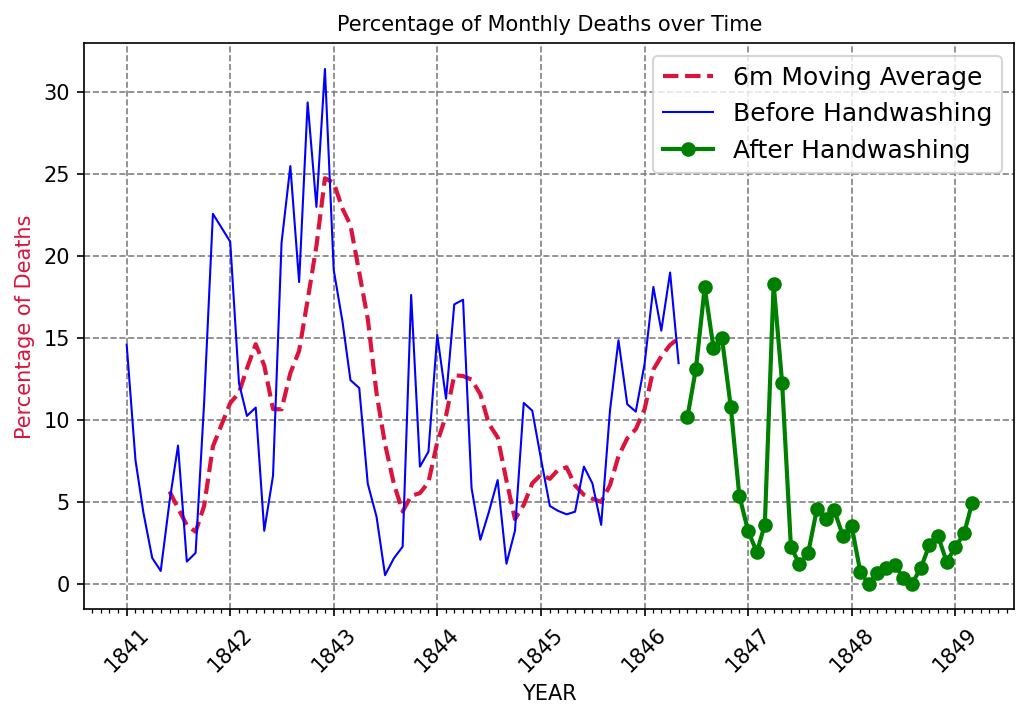

In [47]:
plt.figure(figsize=(8,5), dpi=150)
plt.title('Percentage of Monthly Deaths over Time', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=45)
# plt.grid(b=True, axis='both', which='major')
rolling_avg = df_monthly[['births', 'deaths']].rolling(window=6).mean()

# TICKS
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax = plt.gca()
# Settig up the ticks on the x-axis
ax.set_xlabel('YEAR', fontsize=10,)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.ylabel('Percentage of Deaths', fontsize=10, color='crimson')

# grid
plt.grid(color='grey', linestyle='--')
# setting y-limits and x-limits
# ax.set_ylim(180, 370)

# Plotting the graph
ma_fig = plt.plot(
          roll_avg.index, 
          roll_avg.pct_deaths, 
          color='crimson', 
          linewidth=2, 
          linestyle='--',
          label='6m Moving Average')
bh_fig = plt.plot(
          before_hdwsh.date, 
          before_hdwsh.pct_deaths, 
          color='blue', 
          linewidth=1, 
          linestyle='-',
          label='Before Handwashing')
ah_fig = plt.plot(
          after_hdwsh.date, 
          after_hdwsh.pct_deaths, 
          color='green', 
          linewidth=2, 
          marker='o',
          label='After Handwashing')

plt.legend(['6m Moving Average','Before Handwashing', 'After Handwashing'], fontsize=12)

# Displays chart explicitly
plt.show()